In [1]:
#creating some data to test the normal equation to find the required parameters
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

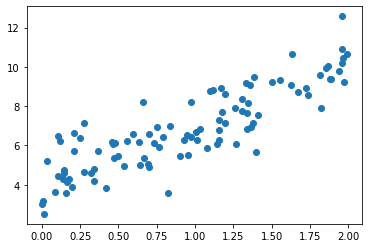

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03064377],
       [9.99393634]])

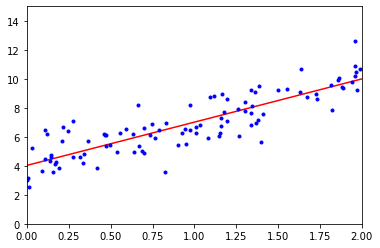

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
#performing this same linear regression using scikit learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

The above method is more efficient than directly computing the normal equation. In addition to that, if matrix has no inverse, normal equation doesnt work, but this linear regression method in sklearn works because it calculates the pseudo-inverse via the Moore-Penrose method

We can improve the way we estimate the parameters in any machine learning scenario via gradient descent. The most basic is batch gradient descent where all the training examples are used at the same time.

Stochastic GD is when the training examples are stochastically chosen and used for training one at a time. If we wish to implement Stochastic Gradient Descent we have a specific class for that

In [7]:
from sklearn.linear_model import SGDRegressor

In [8]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

The final type of gradient descent is mini-batch gradient descent

### Fitting Polynomial Features

In [9]:
# defining a quadriatic distribution to serve as our data
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) #this last part is to simulate some random noise

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False, )
X_poly = poly_features.fit_transform(X)


In [11]:
X[0], X_poly

(array([-2.81710753]),
 array([[-2.81710753e+00,  7.93609482e+00],
        [-2.63830695e-02,  6.96066356e-04],
        [ 1.92842301e+00,  3.71881529e+00],
        [-1.45200937e+01,  2.10833121e+02],
        [ 5.09970640e+00,  2.60070054e+01],
        [-9.04523338e+00,  8.18162469e+01],
        [-3.79862855e+00,  1.44295789e+01],
        [-7.83020365e+00,  6.13120892e+01],
        [-4.98884773e+00,  2.48886017e+01],
        [-1.30403039e+01,  1.70049526e+02],
        [-1.96561384e+00,  3.86363775e+00],
        [-2.00715495e+00,  4.02867098e+00],
        [-1.18232368e+01,  1.39788929e+02],
        [-2.07447274e+00,  4.30343714e+00],
        [ 3.85461352e+00,  1.48580454e+01],
        [-6.33201531e+00,  4.00944179e+01],
        [-1.44850893e+01,  2.09817813e+02],
        [-3.43901878e+00,  1.18268502e+01],
        [-7.76498290e+00,  6.02949595e+01],
        [-2.51184457e+00,  6.30936313e+00],
        [-1.77896514e+01,  3.16471696e+02],
        [ 6.13043792e+00,  3.75822691e+01],
        [

In [12]:
#we fit these polynomial features into the linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

LinearRegression()

### Looking at learning curves to estimate the fit of model to data

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

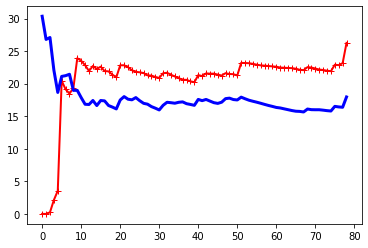

In [14]:
#plotting the error curves for our quadratic curve above
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

## A good way to reduce test error is to use modified types of regression

In [16]:
# ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [17]:
ridge_reg.predict([[1.5]])

array([[10.11423414]])

In [18]:
# lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([10.12465678])

In [20]:
# elastic net (mix of Ridge and Lasso)
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([10.13571332])